# 3.1 Set the pulse amplitude to –5 and the pulse duration to 5 ms. What happens for hyperpolarizing current injections?

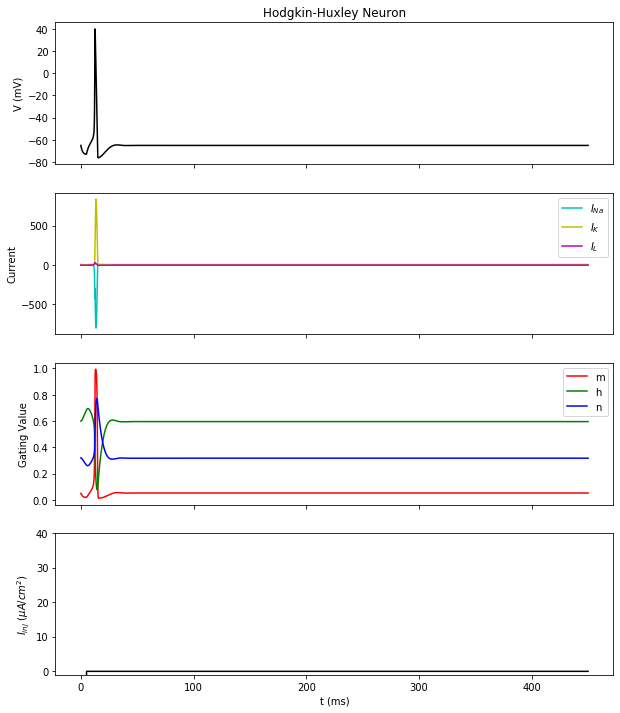

In [2]:
from HodgkinHuxley import HodgkinHuxley
model = HodgkinHuxley()
model.I_inj = lambda t: -5 if t < 5 else 0
model.gen_plots(["V", "I", "gate", "I_inj"])

Hm, there is still something that looks like an action potential! But note that this happens **after** the hyperpolarizing current is stopped.

# 3.2 What is the threshold, in terms of current magnitude and pulse duration, for eliciting this so-called anode break excitation?

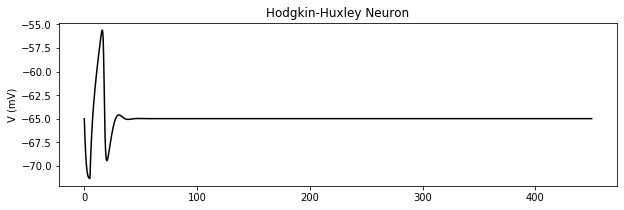

In [3]:
model = HodgkinHuxley()
model.I_inj = lambda t: -4.035 if t < 5 else 0
model.gen_plots(["V"])

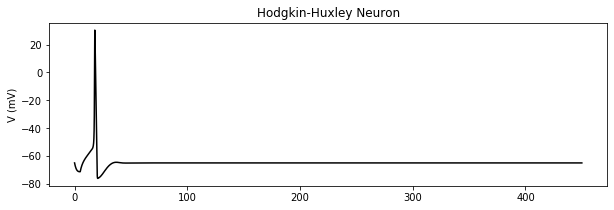

In [4]:
model = HodgkinHuxley()
model.I_inj = lambda t: -4.036 if t < 5 else 0
model.gen_plots(["V"])

For a pulse duration of 5ms, we need to set the injected current to lower than **~-4.036** to see the anode break excitation.

# What mechanisms in the model are responsible for this behaviour? Look at the time course of the activation and inactivation variables n, m and h.

<IPython.core.display.Javascript object>


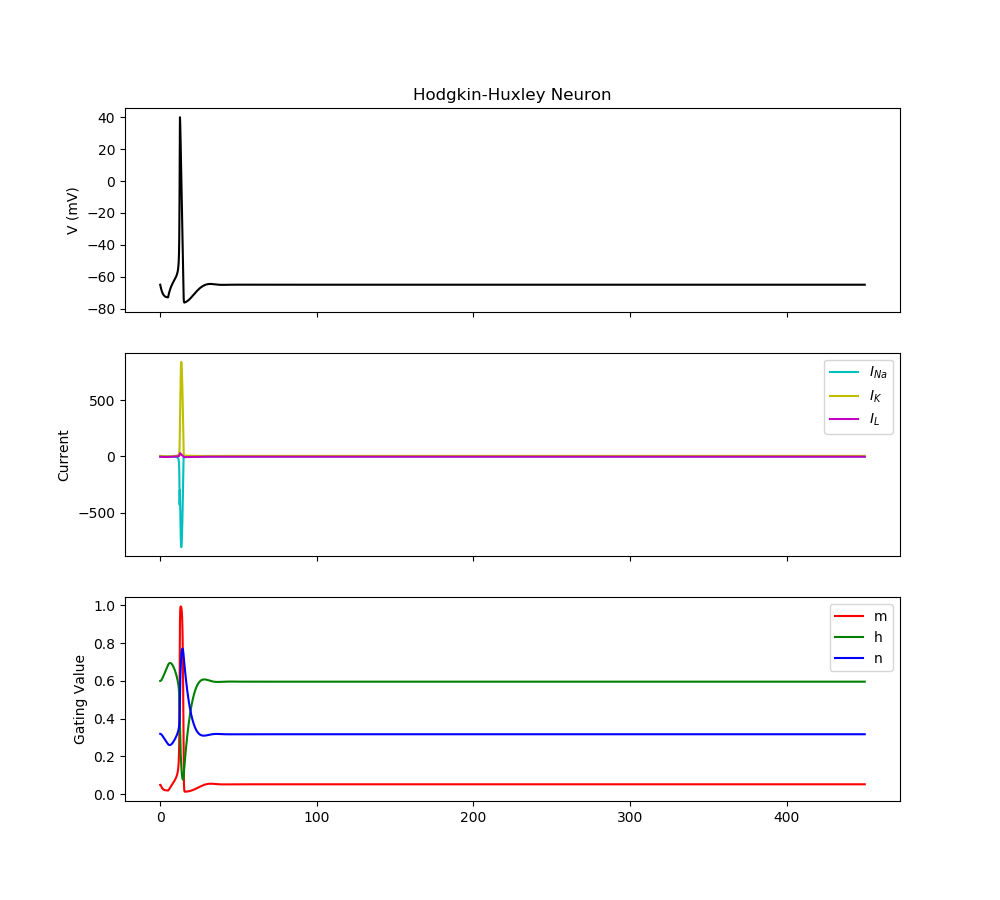

In [6]:
%matplotlib notebook
model = HodgkinHuxley()
model.I_inj = lambda t: -5 if t < 5 else 0
model.gen_plots(["V", "I", "gate"])

<IPython.core.display.Javascript object>


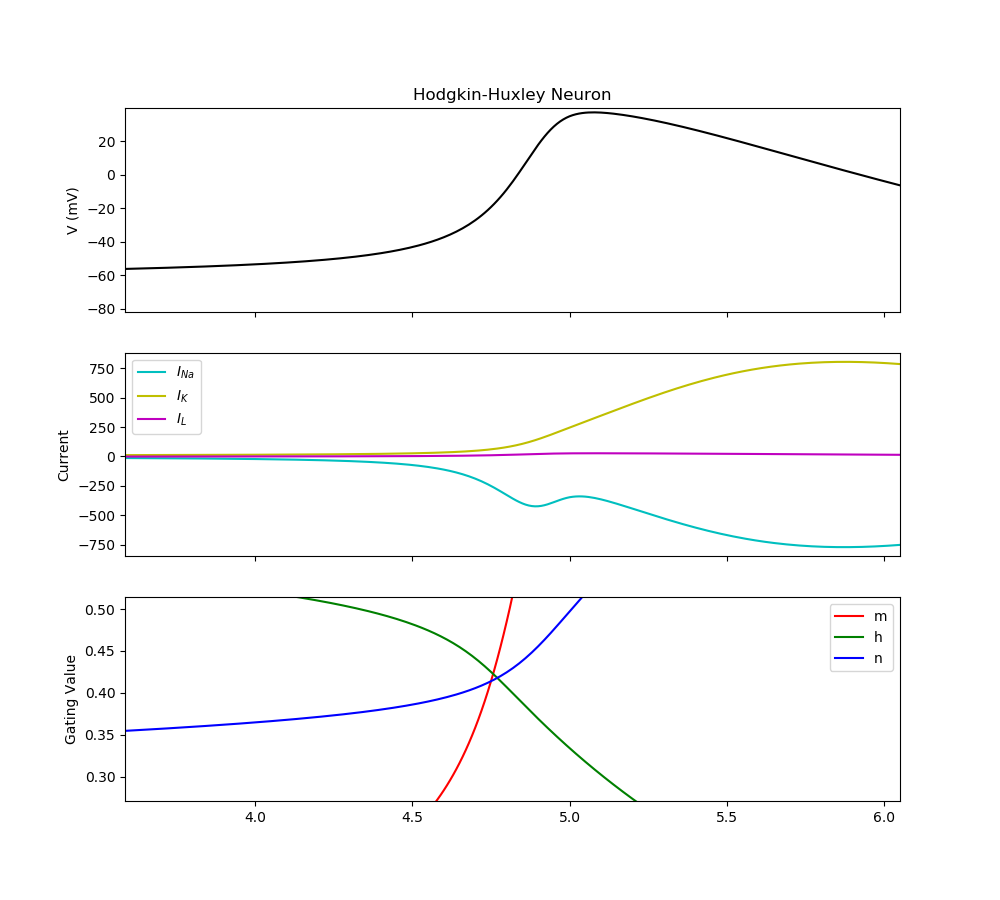

In [7]:
model = HodgkinHuxley()
model.I_inj = lambda t: 3 if t < 5 else 0
model.gen_plots(["V", "I", "gate"])

We first start by discussing the behavior of the gating value for the initial **depolarizing** current that lasts for 5 ms. We see that the the gating variables [m ,n] were increasing and [h] was decreasing until they cross with each other (not at a common point) at t = 5ms, at which point these three variables continue their trajectory with higher magnitudes, before reversing their directions. The voltage graph also shows that this crossing of the gating variables is the peak of the action potential.

Now we look at the **hyperpolarizing** current that lasts for 5 ms. For the gating variables, the first 5 ms showed trajectories that move in **opposite** directions compared to the **depolarizing** current. That is,  [m] was decreasing, and [h] was increasing. After the the 5ms, however, the gating variables then start to follow the same trajectories during **hyperpolarizing** current, and a delayed action potential happens 7 ms later.

My understanding behind the **mechanism** of the model was the following. Firstly, the hyperpolarizing current reduces the membrane potential difference to **below** the resting potential. Then, on the removal of the hyperpolarizing current, the gating variables and the membrane potential moves back to recover to resting potential. Given a strong enough initial hyperpolarizing current, this momentum would be maintained long enough to trigger the crossing of the gating variables, and thus result in an action potential. The phenomenon of the momentum being maintained is thanks to the model using differential equations with smooth transitions.